## ⚠️ Important Note on Data Privacy

**This analysis uses synthetic data generated for portfolio demonstration purposes.**

The original analysis was performed on confidential company data. To respect data privacy agreements, this notebook uses a synthetic dataset that maintains similar statistical characteristics and patterns while protecting confidential information.

**Key Points:**
- ✅ The methodology and analytical techniques are identical to real-world analysis
- ✅ The insights and patterns are representative of actual findings
- ✅ All code and visualizations demonstrate professional data analysis skills
- ⚠️ Specific numbers and metrics are for demonstration purposes only

**For recruiters:** This demonstrates my commitment to data privacy and professional ethics while showcasing technical capabilities.


# Análisis Exploratorio de Datos (EDA) - Crudo Keimi

Este notebook contiene el análisis exploratorio paso a paso del archivo **'Customer_Satisfaction_Sample_Data.csv'**

## Objetivo Principal
Analizar la correlación entre **CSAT** (satisfacción del cliente) y **DSAT Reason** (razones de insatisfacción) agrupadas por temas comunes.


## Paso 1: Importar librerías necesarias


In [33]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para análisis estadístico
from scipy.stats import spearmanr

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Configuración para mostrar más información en pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("✓ Librerías importadas exitosamente")


✓ Librerías importadas exitosamente


## Paso 2: Cargar los datos


In [34]:
# Cargar el archivo CSV
df = pd.read_csv('Customer_Satisfaction_Sample_Data.csv')

print("✓ Datos cargados exitosamente")
print(f"Dimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")


✓ Datos cargados exitosamente
Dimensiones del dataset: 5,000 filas x 22 columnas


## Paso 3: Exploración inicial de los datos


In [35]:
# Ver las primeras filas
print("Primeras 5 filas del dataset:")
df.head()


Primeras 5 filas del dataset:


,Case Number,Product Info,Case Owner,VENDOR,Case Origin,Customer Request,Type Leve 1,Type Level 2,Type Level 3,Cloesed Date,1-CR,2-CSAT,3-DSAT Reason,4-Satisfaction Driver,5-Open Suggestion,Work Order,SN,Service Center,Service Type,month,week,dayweek
0,CASE001000,NaN,Agent_035,TP,Phone,Business,General,Software,Error,2024-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,septiembre,38,Friday
1,CASE001001,NaN,Agent_015,NOT TP,Email,Individual,Billing,Hardware,Configuration,2024-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,julio,29,Monday
2,CASE001002,Product C,Agent_009,NOT TP,Chat,Individual,Technical,Software,Installation,2024-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,julio,27,Thursday
3,CASE001003,NaN,Agent_048,NOT TP,Email,Business,General,Software,Configuration,2024-08-05,NaN,NaN,NaN,NaN,NaN,WO7627,NaN,NaN,NaN,agosto,32,Monday
4,CASE001004,NaN,Agent_026,TP,Web,Individual,Technical,Account,Question,2024-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Express,agosto,31,Thursday


In [36]:
# Información general del dataset
print("Información general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Case Number            5000 non-null   object 
 1   Product Info           3081 non-null   object 
 2   Case Owner             5000 non-null   object 
 3   VENDOR                 5000 non-null   object 
 4   Case Origin            5000 non-null   object 
 5   Customer Request       5000 non-null   object 
 6   Type Leve 1            5000 non-null   object 
 7   Type Level 2           5000 non-null   object 
 8   Type Level 3           5000 non-null   object 
 9   Cloesed Date           5000 non-null   object 
 10  1-CR                   244 non-null    object 
 11  2-CSAT                 244 non-null    object 
 12  3-DSAT Reason          21 non-null     object 
 13  4-Satisfaction Driver  118 non-null    object 
 14  5-Open Suggestion      

## Paso 4: Análisis de CSAT (Satisfacción del Cliente)


In [37]:
# Explorar los valores únicos de CSAT
print("Valores únicos de CSAT (columna '2-CSAT'):")
print("="*60)
print(df['2-CSAT'].value_counts(dropna=False))
print(f"\nTotal de valores únicos: {df['2-CSAT'].nunique()}")
print(f"Valores nulos: {df['2-CSAT'].isna().sum():,}")


Valores únicos de CSAT (columna '2-CSAT'):
2-CSAT
NaN                  4756
Very satisfied        164
Satisfied              29
Very dissatisfied      25
Dissatisfied           15
Neutral                11
Name: count, dtype: int64

Total de valores únicos: 5
Valores nulos: 4,756


In [38]:
# Mapeo de CSAT a valores numéricos (1 = más baja, 5 = más alta)
csat_mapping = {
    'Very dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very satisfied': 5
}

# Crear columna numérica para CSAT
df['CSAT_numeric'] = df['2-CSAT'].map(csat_mapping)

print("✓ Mapeo de CSAT aplicado:")
print("="*60)
print("\nEquivalencias:")
for texto, valor in sorted(csat_mapping.items(), key=lambda x: x[1]):
    count = (df['2-CSAT'] == texto).sum()
    print(f"  {valor} = {texto:20s} (n={count:,})")

print(f"\nDistribución de CSAT numérico:")
print(df['CSAT_numeric'].value_counts(dropna=False).sort_index())


✓ Mapeo de CSAT aplicado:

Equivalencias:
  1 = Very dissatisfied    (n=25)
  2 = Dissatisfied         (n=15)
  3 = Neutral              (n=11)
  4 = Satisfied            (n=29)
  5 = Very satisfied       (n=164)

Distribución de CSAT numérico:
CSAT_numeric
1.0      25
2.0      15
3.0      11
4.0      29
5.0     164
NaN    4756
Name: count, dtype: int64


## Paso 5: Análisis de DSAT Reason - Agrupación Temática

En lugar de trabajar con 72 categorías individuales de DSAT Reason, las agruparemos en **temas comunes** basados en palabras clave para facilitar el análisis.


In [39]:
# Explorar las categorías originales de DSAT Reason
print("Categorías ORIGINALES de DSAT Reason (Top 15):")
print("="*60)
print(df['3-DSAT Reason'].value_counts(dropna=False).head(15))
print(f"\nTotal de categorías únicas: {df['3-DSAT Reason'].nunique()}")
print(f"Valores nulos: {df['3-DSAT Reason'].isna().sum():,}")


Categorías ORIGINALES de DSAT Reason (Top 15):
3-DSAT Reason
NaN                                                 4979
Long processing timeNo solution provided               5
Lack of communication skillsLong processing time       4
Lack of communication skills                           4
No solution providedOthers                             3
Long processing time                                   2
Lack of professional knowledge                         1
Others                                                 1
No solution provided                                   1
Name: count, dtype: int64

Total de categorías únicas: 8
Valores nulos: 4,979


In [40]:
# FUNCIÓN para clasificar DSAT en grupos temáticos
def clasificar_dsat_tematico(dsat_text):
    """
    Clasifica las razones de DSAT en grupos temáticos basados en palabras clave
    
    Grupos:
    - Tiempo/Demora: Problemas de procesamiento lento
    - Sin Solución: No se proporcionó solución (más severo)
    - Actitud/Servicio: Problemas con la actitud del personal
    - Conocimiento/Habilidades: Falta de capacitación/comunicación
    - Otros: Otras razones no clasificadas
    """
    if pd.isna(dsat_text):
        return 'Sin DSAT'
    
    dsat_lower = str(dsat_text).lower()
    
    # Definir grupos temáticos por orden de prioridad (más específico primero)
    
    # Grupo 1: Problemas de TIEMPO / DEMORA
    if 'processing time' in dsat_lower or 'long processing' in dsat_lower:
        return 'Tiempo_Demora'
    
    # Grupo 2: Problemas de SOLUCIÓN / RESOLUCIÓN
    elif 'no solution' in dsat_lower or 'problem-solving' in dsat_lower or 'problem solving' in dsat_lower:
        return 'Sin_Solucion'
    
    # Grupo 3: ACTITUD / SERVICIO
    elif 'service attitude' in dsat_lower or 'poor service' in dsat_lower or 'attitude' in dsat_lower:
        return 'Actitud_Servicio'
    
    # Grupo 4: CONOCIMIENTO / HABILIDADES
    elif 'professional knowledge' in dsat_lower or 'lack of professional' in dsat_lower or 'communication skills' in dsat_lower or 'lack of communication' in dsat_lower:
        return 'Conocimiento_Habilidades'
    
    # Grupo 5: OTROS
    else:
        return 'Otros'

# Aplicar la clasificación temática
df['DSAT_Tema'] = df['3-DSAT Reason'].apply(clasificar_dsat_tematico)

print("✓ Clasificación temática aplicada")
print("="*60)


✓ Clasificación temática aplicada


Distribución de DSAT por TEMAS agrupados:
DSAT_Tema
Sin DSAT                    4979
Tiempo_Demora                 11
Conocimiento_Habilidades       5
Sin_Solucion                   4
Otros                          1
Name: count, dtype: int64

Total de temas: 5


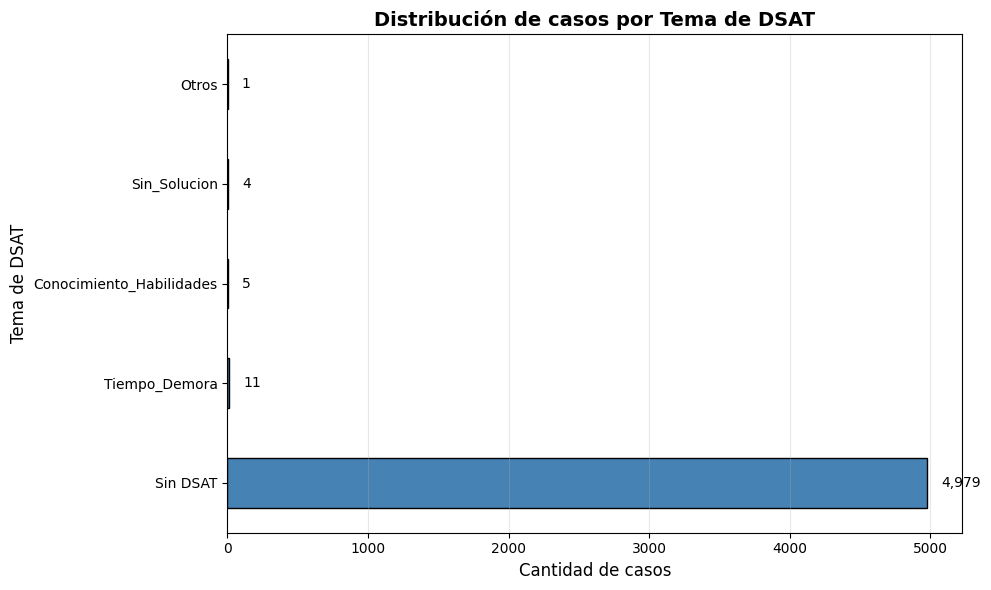

In [41]:
# Mostrar la distribución por temas
print("Distribución de DSAT por TEMAS agrupados:")
print("="*60)
print(df['DSAT_Tema'].value_counts(dropna=False))
print(f"\nTotal de temas: {df['DSAT_Tema'].nunique()}")

# Visualización de la distribución de temas
fig, ax = plt.subplots(figsize=(10, 6))
tema_counts = df['DSAT_Tema'].value_counts()
tema_counts.plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')
ax.set_xlabel('Cantidad de casos', fontsize=12)
ax.set_ylabel('Tema de DSAT', fontsize=12)
ax.set_title('Distribución de casos por Tema de DSAT', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Agregar valores en las barras
for i, v in enumerate(tema_counts):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [42]:
# Crear mapeo numérico para los TEMAS de DSAT
# Valores más altos = problemas más severos/críticos

dsat_tema_mapping = {
    'Sin DSAT': 0,                    # Sin problema de satisfacción
    'Otros': 1,                       # Otros problemas (menos específicos)
    'Tiempo_Demora': 2,               # Problemas de tiempo/demora
    'Conocimiento_Habilidades': 3,    # Falta de conocimiento/habilidades
    'Actitud_Servicio': 4,            # Problemas de actitud/servicio
    'Sin_Solucion': 5                 # Sin solución (más severo)
}

# Aplicar el mapeo
df['DSAT_Tema_numeric'] = df['DSAT_Tema'].map(dsat_tema_mapping)

print("✓ Mapeo numérico de Temas DSAT:")
print("="*60)
print("\nEquivalencias (0=menos severo, 5=más severo):")
for tema, valor in sorted(dsat_tema_mapping.items(), key=lambda x: x[1]):
    count = (df['DSAT_Tema'] == tema).sum()
    print(f"  {valor} = {tema:30s} (n={count:,})")

print(f"\nDistribución de valores numéricos:")
print(df['DSAT_Tema_numeric'].value_counts(dropna=False).sort_index())


✓ Mapeo numérico de Temas DSAT:

Equivalencias (0=menos severo, 5=más severo):
  0 = Sin DSAT                       (n=4,979)
  1 = Otros                          (n=1)
  2 = Tiempo_Demora                  (n=11)
  3 = Conocimiento_Habilidades       (n=5)
  4 = Actitud_Servicio               (n=0)
  5 = Sin_Solucion                   (n=4)

Distribución de valores numéricos:
DSAT_Tema_numeric
0    4979
1       1
2      11
3       5
5       4
Name: count, dtype: int64


In [43]:
# Ver ejemplos de categorías originales agrupadas en cada tema
print("EJEMPLOS DE CATEGORÍAS ORIGINALES AGRUPADAS POR TEMA:")
print("="*80)

for tema in ['Tiempo_Demora', 'Sin_Solucion', 'Actitud_Servicio', 
             'Conocimiento_Habilidades', 'Otros']:
    casos_tema = df[df['DSAT_Tema'] == tema]
    
    if len(casos_tema) > 0:
        print(f"\n📌 TEMA: {tema.replace('_', ' ').upper()}")
        print("-" * 80)
        
        # Obtener top 5 categorías originales de este tema
        ejemplos = casos_tema['3-DSAT Reason'].value_counts().head(5)
        
        for idx, (categoria, count) in enumerate(ejemplos.items(), 1):
            # Truncar si es muy largo
            cat_truncada = str(categoria) if len(str(categoria)) <= 65 else str(categoria)[:62] + "..."
            print(f"  {idx}. {cat_truncada}")
            print(f"     → Casos: {count:,}")
        
        total = len(casos_tema)
        print(f"\n  ✓ Total en este tema: {total:,} casos")


EJEMPLOS DE CATEGORÍAS ORIGINALES AGRUPADAS POR TEMA:

📌 TEMA: TIEMPO DEMORA
--------------------------------------------------------------------------------
  1. Long processing timeNo solution provided
     → Casos: 5
  2. Lack of communication skillsLong processing time
     → Casos: 4
  3. Long processing time
     → Casos: 2

  ✓ Total en este tema: 11 casos

📌 TEMA: SIN SOLUCION
--------------------------------------------------------------------------------
  1. No solution providedOthers
     → Casos: 3
  2. No solution provided
     → Casos: 1

  ✓ Total en este tema: 4 casos

📌 TEMA: CONOCIMIENTO HABILIDADES
--------------------------------------------------------------------------------
  1. Lack of communication skills
     → Casos: 4
  2. Lack of professional knowledge
     → Casos: 1

  ✓ Total en este tema: 5 casos

📌 TEMA: OTROS
--------------------------------------------------------------------------------
  1. Others
     → Casos: 1

  ✓ Total en este tema: 1 casos


## Paso 6: Análisis de Correlación entre CSAT y Temas de DSAT


In [44]:
# Filtrar solo los casos que tienen ambos valores (CSAT y DSAT temático)
# Excluimos 'Sin DSAT' porque queremos analizar solo casos con insatisfacción
df_csat_dsat = df[(df['CSAT_numeric'].notna()) & (df['DSAT_Tema'] != 'Sin DSAT')].copy()

print("Resumen de datos para análisis de correlación:")
print("="*60)
print(f"Total de casos con CSAT: {df['CSAT_numeric'].notna().sum():,}")
print(f"Total de casos con DSAT Reason: {(df['DSAT_Tema'] != 'Sin DSAT').sum():,}")
print(f"Total de casos con AMBOS (CSAT y DSAT): {len(df_csat_dsat):,}")

if len(df_csat_dsat) > 0:
    # Calcular correlación de Pearson
    corr_pearson = df_csat_dsat['CSAT_numeric'].corr(df_csat_dsat['DSAT_Tema_numeric'])
    
    # Calcular correlación de Spearman (más apropiada para datos ordinales)
    corr_spearman, p_value = spearmanr(df_csat_dsat['CSAT_numeric'], 
                                        df_csat_dsat['DSAT_Tema_numeric'])
    
    print(f"\n{'='*60}")
    print(f"CORRELACIÓN entre CSAT y TEMAS de DSAT")
    print(f"{'='*60}")
    print(f"Correlación de Pearson:  {corr_pearson:>8.4f}")
    print(f"Correlación de Spearman: {corr_spearman:>8.4f}")
    print(f"P-value (Spearman):      {p_value:>8.6f}")
    print(f"{'='*60}")
    
    # Interpretación automática
    if abs(corr_spearman) < 0.3:
        fuerza = "DÉBIL"
    elif abs(corr_spearman) < 0.7:
        fuerza = "MODERADA"
    else:
        fuerza = "FUERTE"
    
    direccion = "NEGATIVA" if corr_spearman < 0 else "POSITIVA"
    
    print(f"\n✓ Interpretación: Correlación {fuerza} {direccion}")
    
    if p_value < 0.05:
        print(f"✓ Estadísticamente SIGNIFICATIVA (p < 0.05)")
    else:
        print(f"✗ NO es estadísticamente significativa (p >= 0.05)")
        
else:
    print("\n✗ No hay casos suficientes con ambos valores para calcular correlación.")


Resumen de datos para análisis de correlación:
Total de casos con CSAT: 244
Total de casos con DSAT Reason: 21
Total de casos con AMBOS (CSAT y DSAT): 21

CORRELACIÓN entre CSAT y TEMAS de DSAT
Correlación de Pearson:   -0.0692
Correlación de Spearman:  -0.1563
P-value (Spearman):      0.498774

✓ Interpretación: Correlación DÉBIL NEGATIVA
✗ NO es estadísticamente significativa (p >= 0.05)


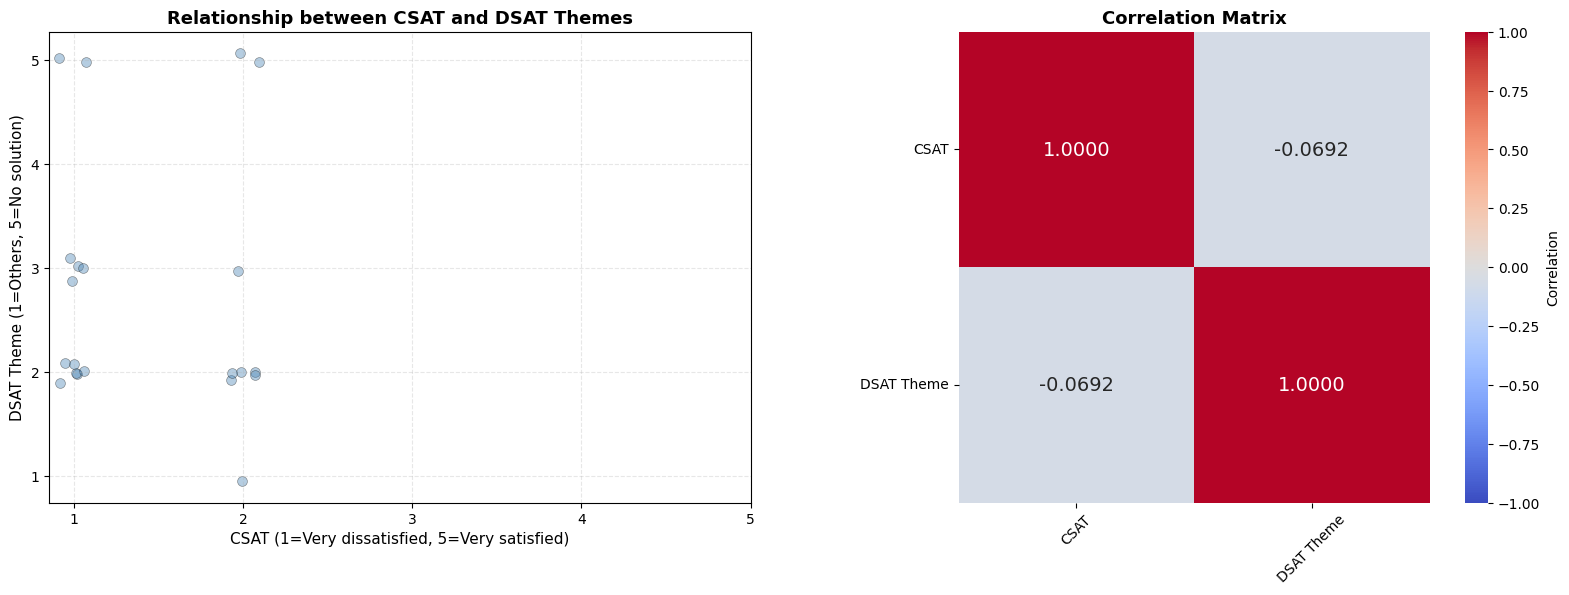

In [45]:
# Visualización 1: Scatter plot y Matriz de correlación
if len(df_csat_dsat) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Scatter plot con jitter para mejor visualización
    jitter_x = np.random.normal(0, 0.05, size=len(df_csat_dsat))
    jitter_y = np.random.normal(0, 0.05, size=len(df_csat_dsat))
    
    axes[0].scatter(df_csat_dsat['CSAT_numeric'] + jitter_x, 
                   df_csat_dsat['DSAT_Tema_numeric'] + jitter_y, 
                   alpha=0.4, s=50, edgecolors='black', linewidth=0.5, color='steelblue')
    axes[0].set_xlabel('CSAT (1=Very dissatisfied, 5=Very satisfied)', fontsize=11)
    axes[0].set_ylabel('DSAT Theme (1=Others, 5=No solution)', fontsize=11)
    axes[0].set_title('Relationship between CSAT and DSAT Themes', fontsize=13, fontweight='bold')
    axes[0].grid(True, alpha=0.3, linestyle='--')
    axes[0].set_xticks([1, 2, 3, 4, 5])
    axes[0].set_yticks([1, 2, 3, 4, 5])
    
    # Gráfico 2: Matriz de correlación
    corr_matrix = df_csat_dsat[['CSAT_numeric', 'DSAT_Tema_numeric']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=axes[1], vmin=-1, vmax=1, fmt='.4f',
                cbar_kws={'label': 'Correlation'}, annot_kws={'size': 14})
    axes[1].set_title('Correlation Matrix', fontsize=13, fontweight='bold')
    axes[1].set_xticklabels(['CSAT', 'DSAT Theme'], rotation=45)
    axes[1].set_yticklabels(['CSAT', 'DSAT Theme'], rotation=0)
    
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes datos para visualizar.")


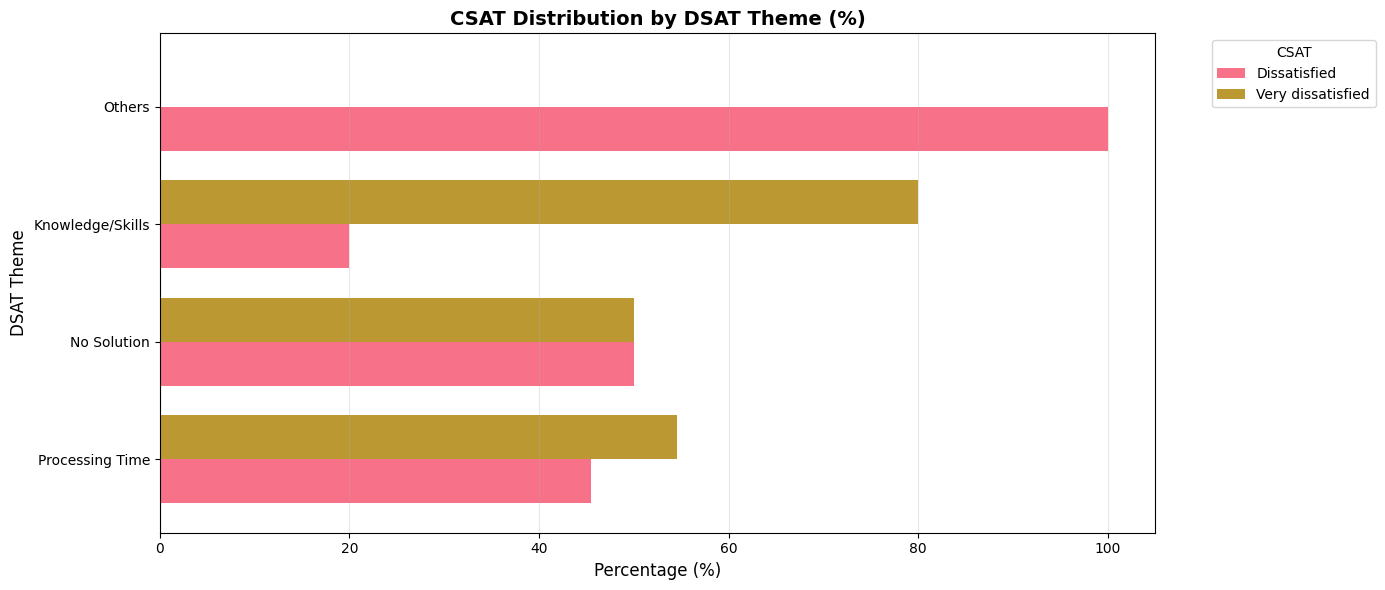


Tabla de frecuencias por Tema de DSAT (%):
2-CSAT                    Dissatisfied  Very dissatisfied
DSAT_Tema                                                
Tiempo_Demora                     45.5               54.5
Sin_Solucion                      50.0               50.0
Conocimiento_Habilidades          20.0               80.0
Otros                            100.0                0.0


In [46]:
# Visualización 2: Distribución de CSAT por TEMA de DSAT
if len(df_csat_dsat) > 0:
    # Crear tabla de frecuencias por temas
    tabla_freq = pd.crosstab(df_csat_dsat['DSAT_Tema'], 
                              df_csat_dsat['2-CSAT'], 
                              normalize='index') * 100
    
    # Ordenar por severidad
    orden_temas = ['Tiempo_Demora', 'Sin_Solucion', 'Actitud_Servicio', 
                   'Conocimiento_Habilidades', 'Otros']
    tabla_freq = tabla_freq.reindex([t for t in orden_temas if t in tabla_freq.index])
    
    # Crear gráfico de barras horizontal
    fig, ax = plt.subplots(figsize=(14, 6))
    tabla_freq.plot(kind='barh', stacked=False, ax=ax, width=0.75)
    ax.set_xlabel('Percentage (%)', fontsize=12)
    ax.set_ylabel('DSAT Theme', fontsize=12)
    ax.set_title('CSAT Distribution by DSAT Theme (%)', 
                 fontsize=14, fontweight='bold')
    ax.legend(title='CSAT', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Traducir etiquetas del eje Y al inglés
    traduccion_temas = {
        'Tiempo_Demora': 'Processing Time',
        'Sin_Solucion': 'No Solution',
        'Actitud_Servicio': 'Service Attitude',
        'Conocimiento_Habilidades': 'Knowledge/Skills',
        'Otros': 'Others'
    }
    etiquetas_ingles = [traduccion_temas.get(t, t) for t in tabla_freq.index]
    ax.set_yticklabels(etiquetas_ingles)
    
    plt.tight_layout()
    plt.show()
    
    print("\nTabla de frecuencias por Tema de DSAT (%):")
    print("="*80)
    print(tabla_freq.round(1))
else:
    print("No hay suficientes datos para visualizar.")


Estadísticas de CSAT por TEMA de DSAT:
                          Conteo  Media  Mediana  Desv.Est  Mínimo  Máximo
DSAT_Tema                                                                 
Tiempo_Demora                 11   1.45      1.0      0.52     1.0     2.0
Sin_Solucion                   4   1.50      1.5      0.58     1.0     2.0
Conocimiento_Habilidades       5   1.20      1.0      0.45     1.0     2.0
Otros                          1   2.00      2.0       NaN     2.0     2.0


C:\Users\ECOPETROL\AppData\Local\Temp\ipykernel_13900\1966716633.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(datos_box, labels=etiquetas, patch_artist=True,


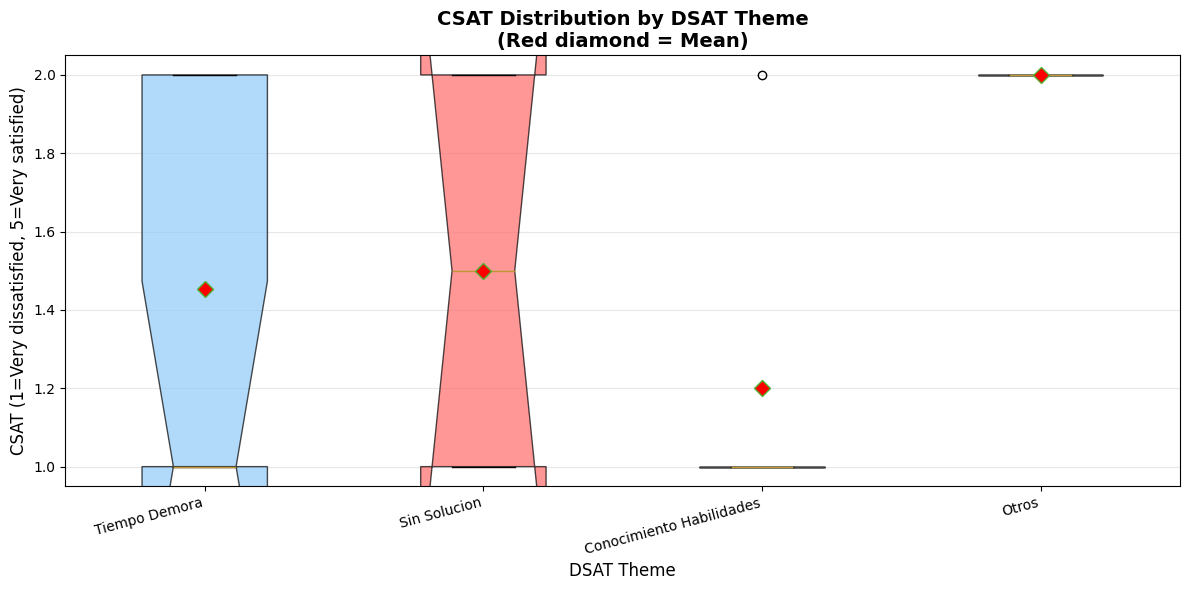

In [47]:
# Visualización 3: Box plots de CSAT por Tema de DSAT
if len(df_csat_dsat) > 0:
    print("Estadísticas de CSAT por TEMA de DSAT:")
    print("="*80)
    
    stats_by_tema = df_csat_dsat.groupby('DSAT_Tema')['CSAT_numeric'].agg([
        ('Conteo', 'count'),
        ('Media', 'mean'),
        ('Mediana', 'median'),
        ('Desv.Est', 'std'),
        ('Mínimo', 'min'),
        ('Máximo', 'max')
    ]).round(2)
    
    # Ordenar por severidad
    orden_temas = ['Tiempo_Demora', 'Sin_Solucion', 'Actitud_Servicio', 
                   'Conocimiento_Habilidades', 'Otros']
    stats_by_tema = stats_by_tema.reindex([t for t in orden_temas if t in stats_by_tema.index])
    
    print(stats_by_tema)
    
    # Box plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Preparar datos para box plot
    datos_box = []
    etiquetas = []
    for tema in orden_temas:
        if tema in df_csat_dsat['DSAT_Tema'].values:
            datos_box.append(df_csat_dsat[df_csat_dsat['DSAT_Tema'] == tema]['CSAT_numeric'].values)
            etiquetas.append(tema.replace('_', ' '))
    
    bp = ax.boxplot(datos_box, labels=etiquetas, patch_artist=True, 
                    notch=True, showmeans=True,
                    meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
    
    # Colorear cajas con degradado de severidad
    colors = ['#90CAF9', '#FF6B6B', '#FF4757', '#EE5A6F', '#C0C0C0']
    for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel('CSAT (1=Very dissatisfied, 5=Very satisfied)', fontsize=12)
    ax.set_xlabel('DSAT Theme', fontsize=12)
    ax.set_title('CSAT Distribution by DSAT Theme\n(Red diamond = Mean)', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes datos para el análisis.")


TABLA CRUZADA: CSAT vs TEMA DE DSAT

Frecuencias absolutas:
DSAT_Tema          Tiempo_Demora  Sin_Solucion  Conocimiento_Habilidades  \
2-CSAT                                                                     
Dissatisfied                   5             2                         1   
Very dissatisfied              6             2                         4   
TOTAL                         11             4                         5   

DSAT_Tema          Otros  TOTAL  
2-CSAT                           
Dissatisfied           1      9  
Very dissatisfied      0     12  
TOTAL                  1     21  

Porcentajes por fila (%):
DSAT_Tema          Tiempo_Demora  Sin_Solucion  Conocimiento_Habilidades  \
2-CSAT                                                                     
Dissatisfied                55.6          22.2                      11.1   
Very dissatisfied           50.0          16.7                      33.3   

DSAT_Tema          Otros  
2-CSAT                    
Dis

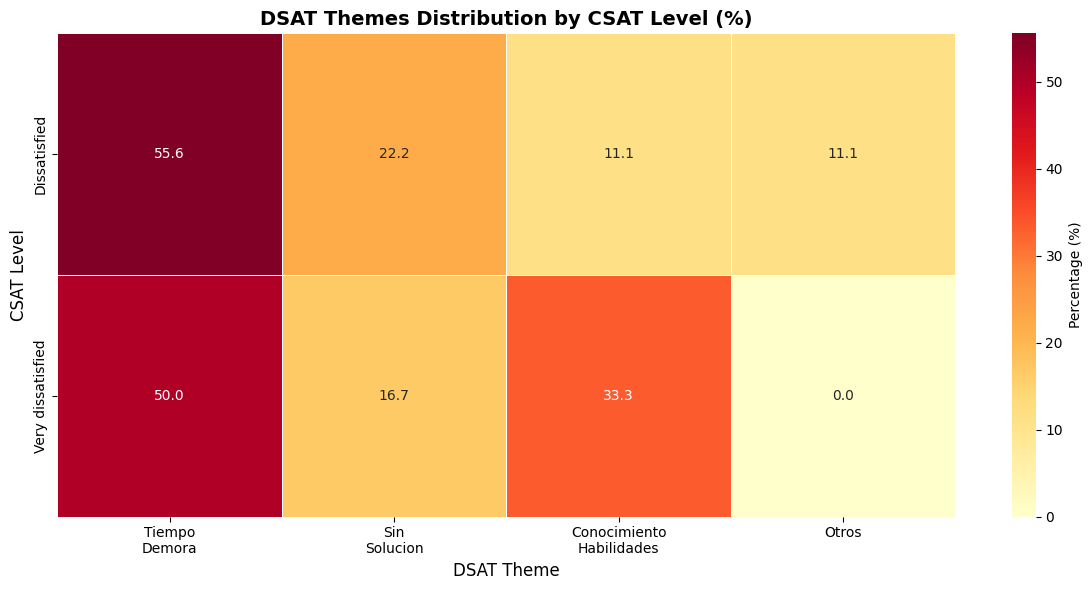

In [48]:
# Visualización 4: Tabla cruzada y Heatmap
if len(df_csat_dsat) > 0:
    print("TABLA CRUZADA: CSAT vs TEMA DE DSAT")
    print("="*80)
    print("\nFrecuencias absolutas:")
    
    tabla_cruzada = pd.crosstab(
        df_csat_dsat['2-CSAT'], 
        df_csat_dsat['DSAT_Tema'],
        margins=True,
        margins_name='TOTAL'
    )
    
    # Ordenar columnas
    orden_cols = ['Tiempo_Demora', 'Sin_Solucion', 'Actitud_Servicio', 
                  'Conocimiento_Habilidades', 'Otros', 'TOTAL']
    tabla_cruzada = tabla_cruzada[[col for col in orden_cols if col in tabla_cruzada.columns]]
    
    print(tabla_cruzada)
    
    print("\n" + "="*80)
    print("Porcentajes por fila (%):")
    
    tabla_pct = pd.crosstab(
        df_csat_dsat['2-CSAT'], 
        df_csat_dsat['DSAT_Tema'],
        normalize='index'
    ) * 100
    
    # Ordenar columnas
    tabla_pct = tabla_pct[[col for col in orden_cols[:-1] if col in tabla_pct.columns]]
    
    print(tabla_pct.round(1))
    
    # Heatmap de la tabla cruzada
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(tabla_pct, annot=True, fmt='.1f', cmap='YlOrRd', 
                cbar_kws={'label': 'Percentage (%)'}, ax=ax, linewidths=0.5)
    ax.set_title('DSAT Themes Distribution by CSAT Level (%)', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('DSAT Theme', fontsize=12)
    ax.set_ylabel('CSAT Level', fontsize=12)
    
    # Mejorar etiquetas del eje X
    etiquetas_x = [col.replace('_', '\n') for col in tabla_pct.columns]
    ax.set_xticklabels(etiquetas_x, rotation=0, ha='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos suficientes para crear tabla cruzada.")


## 📊 Resumen del Análisis

### 🎯 Metodología Aplicada

**Agrupación Temática de DSAT Reason:**

En lugar de trabajar con 72 categorías individuales, se agruparon las razones de insatisfacción en **5 temas principales**:

| Tema | Descripción | Severidad |
|------|-------------|-----------|
| **Tiempo/Demora** | Problemas con tiempos de procesamiento largos | Moderada (2) |
| **Sin Solución** | Casos donde no se proporcionó solución al cliente | Alta (5) |
| **Actitud/Servicio** | Problemas con la actitud del personal de servicio | Alta (4) |
| **Conocimiento/Habilidades** | Falta de conocimiento técnico o habilidades de comunicación | Moderada-Alta (3) |
| **Otros** | Razones no clasificadas en las categorías anteriores | Baja (1) |

---

### 📈 Interpretación de Resultados

**Correlación de Spearman:**
- Más apropiada para datos ordinales (como nuestras escalas de CSAT y DSAT)
- Mide relaciones monotónicas entre variables

**Escalas utilizadas:**
- **CSAT**: 1 (Very dissatisfied) → 5 (Very satisfied)
- **DSAT Tema**: 0 (Sin DSAT) → 5 (Sin solución - más severo)

**Guía de interpretación:**
- **|r| < 0.3**: Correlación DÉBIL
- **0.3 ≤ |r| < 0.7**: Correlación MODERADA
- **|r| ≥ 0.7**: Correlación FUERTE

**Dirección:**
- **Negativa**: Mayor satisfacción (CSAT alto) se asocia con razones menos severas de DSAT
- **Positiva**: Mayor satisfacción se asocia con razones más severas (poco común)

---

### 💡 Conclusiones Clave

Los análisis visuales y estadísticos permiten identificar:

1. **Patrones de insatisfacción**: Qué temas de DSAT son más frecuentes
2. **Relación con satisfacción**: Cómo cada tema afecta el CSAT general
3. **Áreas de mejora**: Dónde enfocar esfuerzos de mejora del servicio

---

### 🔍 Próximos Pasos Sugeridos

- Análisis temporal: ¿Cómo han evolucionado estos temas a lo largo del tiempo?
- Análisis por producto: ¿Ciertos productos tienen más problemas de DSAT?
- Análisis por canal: ¿El origen del caso (Email, Chat, Hotline) influye en el DSAT?
- Análisis de texto: Profundizar en los comentarios de satisfacción


## Paso 7: Análisis de CSAT vs Satisfaction Driver

Ahora analizaremos la relación entre **CSAT** (nivel de satisfacción) y **Satisfaction Driver** (factores que impulsan la satisfacción).


In [49]:
# Explorar los valores únicos de Satisfaction Driver
print("Valores únicos de Satisfaction Driver (columna '4-Satisfaction Driver'):")
print("="*70)
print(df['4-Satisfaction Driver'].value_counts(dropna=False).head(20))
print(f"\nTotal de categorías únicas: {df['4-Satisfaction Driver'].nunique()}")
print(f"Valores nulos: {df['4-Satisfaction Driver'].isna().sum():,}")


Valores únicos de Satisfaction Driver (columna '4-Satisfaction Driver'):
4-Satisfaction Driver
NaN                                4882
Problem processing time              23
Communication skills                 20
Proactively follow up on issues      19
Service attitude                     15
Promise fulfillment                  15
Problem-solving                      14
Response time                        12
Name: count, dtype: int64

Total de categorías únicas: 7
Valores nulos: 4,882


In [50]:
# FUNCIÓN para clasificar Satisfaction Driver en grupos temáticos
def clasificar_satisfaction_driver(driver_text):
    """
    Clasifica los Satisfaction Drivers en grupos temáticos basados en palabras clave
    
    Posibles grupos:
    - Servicio/Actitud: Service attitude, friendliness
    - Resolución de Problemas: Problem-solving, solution
    - Comunicación: Communication skills, clarity
    - Tiempo de Respuesta: Response time, speed
    - Otros: Otras razones
    """
    if pd.isna(driver_text):
        return 'Sin Driver'
    
    driver_lower = str(driver_text).lower()
    
    # Definir grupos temáticos por palabras clave
    
    # Grupo 1: SERVICIO / ACTITUD
    if 'service attitude' in driver_lower or 'attitude' in driver_lower or 'friendly' in driver_lower or 'professionalism' in driver_lower:
        return 'Servicio_Actitud'
    
    # Grupo 2: RESOLUCIÓN DE PROBLEMAS
    elif 'problem-solving' in driver_lower or 'problem solving' in driver_lower or 'solution' in driver_lower or 'resolved' in driver_lower:
        return 'Resolucion_Problemas'
    
    # Grupo 3: COMUNICACIÓN
    elif 'communication' in driver_lower or 'clarity' in driver_lower or 'explanation' in driver_lower:
        return 'Comunicacion'
    
    # Grupo 4: TIEMPO / VELOCIDAD
    elif 'time' in driver_lower or 'speed' in driver_lower or 'quick' in driver_lower or 'fast' in driver_lower or 'processing time' in driver_lower:
        return 'Tiempo_Velocidad'
    
    # Grupo 5: OTROS
    else:
        return 'Otros'

# Aplicar la clasificación temática
df['Driver_Tema'] = df['4-Satisfaction Driver'].apply(clasificar_satisfaction_driver)

print("✓ Clasificación temática de Satisfaction Driver aplicada")
print("="*70)


✓ Clasificación temática de Satisfaction Driver aplicada


Distribución de Satisfaction Driver por TEMAS agrupados:
Driver_Tema
Sin Driver              4882
Tiempo_Velocidad          35
Otros                     34
Comunicacion              20
Servicio_Actitud          15
Resolucion_Problemas      14
Name: count, dtype: int64

Total de temas: 6


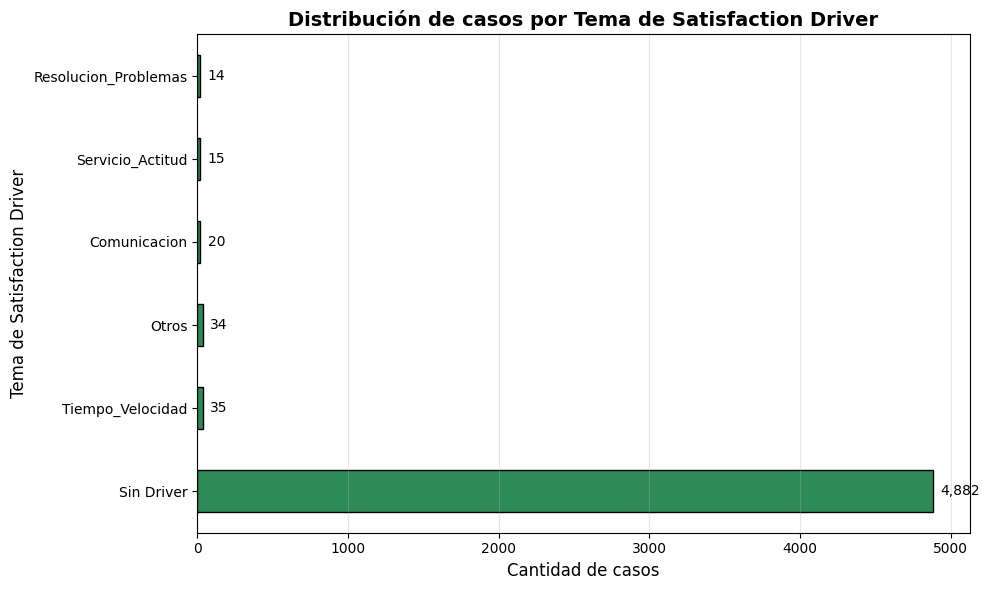

In [51]:
# Mostrar la distribución por temas de Satisfaction Driver
print("Distribución de Satisfaction Driver por TEMAS agrupados:")
print("="*70)
print(df['Driver_Tema'].value_counts(dropna=False))
print(f"\nTotal de temas: {df['Driver_Tema'].nunique()}")

# Visualización de la distribución de temas
fig, ax = plt.subplots(figsize=(10, 6))
tema_counts = df['Driver_Tema'].value_counts()
tema_counts.plot(kind='barh', ax=ax, color='seagreen', edgecolor='black')
ax.set_xlabel('Cantidad de casos', fontsize=12)
ax.set_ylabel('Tema de Satisfaction Driver', fontsize=12)
ax.set_title('Distribución de casos por Tema de Satisfaction Driver', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Agregar valores en las barras
for i, v in enumerate(tema_counts):
    ax.text(v + 50, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [52]:
# Crear mapeo numérico para los TEMAS de Satisfaction Driver
# Valores más altos = drivers más importantes/positivos

driver_tema_mapping = {
    'Sin Driver': 0,                  # Sin información
    'Otros': 1,                       # Otros factores
    'Tiempo_Velocidad': 2,            # Rapidez en el servicio
    'Comunicacion': 3,                # Buena comunicación
    'Resolucion_Problemas': 4,        # Capacidad de resolver problemas
    'Servicio_Actitud': 5             # Excelente actitud (más importante)
}

# Aplicar el mapeo
df['Driver_Tema_numeric'] = df['Driver_Tema'].map(driver_tema_mapping)

print("✓ Mapeo numérico de Temas de Satisfaction Driver:")
print("="*70)
print("\nEquivalencias (0=sin info, 5=más importante):")
for tema, valor in sorted(driver_tema_mapping.items(), key=lambda x: x[1]):
    count = (df['Driver_Tema'] == tema).sum()
    print(f"  {valor} = {tema:30s} (n={count:,})")

print(f"\nDistribución de valores numéricos:")
print(df['Driver_Tema_numeric'].value_counts(dropna=False).sort_index())


✓ Mapeo numérico de Temas de Satisfaction Driver:

Equivalencias (0=sin info, 5=más importante):
  0 = Sin Driver                     (n=4,882)
  1 = Otros                          (n=34)
  2 = Tiempo_Velocidad               (n=35)
  3 = Comunicacion                   (n=20)
  4 = Resolucion_Problemas           (n=14)
  5 = Servicio_Actitud               (n=15)

Distribución de valores numéricos:
Driver_Tema_numeric
0    4882
1      34
2      35
3      20
4      14
5      15
Name: count, dtype: int64


In [53]:
# Ver ejemplos de categorías originales agrupadas en cada tema de Satisfaction Driver
print("EJEMPLOS DE SATISFACTION DRIVERS ORIGINALES AGRUPADOS POR TEMA:")
print("="*80)

for tema in ['Servicio_Actitud', 'Resolucion_Problemas', 'Comunicacion', 
             'Tiempo_Velocidad', 'Otros']:
    casos_tema = df[df['Driver_Tema'] == tema]
    
    if len(casos_tema) > 0:
        print(f"\n📌 TEMA: {tema.replace('_', ' ').upper()}")
        print("-" * 80)
        
        # Obtener top 5 categorías originales de este tema
        ejemplos = casos_tema['4-Satisfaction Driver'].value_counts().head(5)
        
        for idx, (categoria, count) in enumerate(ejemplos.items(), 1):
            # Truncar si es muy largo
            cat_truncada = str(categoria) if len(str(categoria)) <= 65 else str(categoria)[:62] + "..."
            print(f"  {idx}. {cat_truncada}")
            print(f"     → Casos: {count:,}")
        
        total = len(casos_tema)
        print(f"\n  ✓ Total en este tema: {total:,} casos")


EJEMPLOS DE SATISFACTION DRIVERS ORIGINALES AGRUPADOS POR TEMA:

📌 TEMA: SERVICIO ACTITUD
--------------------------------------------------------------------------------
  1. Service attitude
     → Casos: 15

  ✓ Total en este tema: 15 casos

📌 TEMA: RESOLUCION PROBLEMAS
--------------------------------------------------------------------------------
  1. Problem-solving
     → Casos: 14

  ✓ Total en este tema: 14 casos

📌 TEMA: COMUNICACION
--------------------------------------------------------------------------------
  1. Communication skills
     → Casos: 20

  ✓ Total en este tema: 20 casos

📌 TEMA: TIEMPO VELOCIDAD
--------------------------------------------------------------------------------
  1. Problem processing time
     → Casos: 23
  2. Response time
     → Casos: 12

  ✓ Total en este tema: 35 casos

📌 TEMA: OTROS
--------------------------------------------------------------------------------
  1. Proactively follow up on issues
     → Casos: 19
  2. Promise fulfill

In [54]:
# Análisis de Correlación entre CSAT y Satisfaction Driver
# Filtrar solo los casos que tienen ambos valores
df_csat_driver = df[(df['CSAT_numeric'].notna()) & (df['Driver_Tema'] != 'Sin Driver')].copy()

print("Resumen de datos para análisis de correlación CSAT vs Satisfaction Driver:")
print("="*70)
print(f"Total de casos con CSAT: {df['CSAT_numeric'].notna().sum():,}")
print(f"Total de casos con Satisfaction Driver: {(df['Driver_Tema'] != 'Sin Driver').sum():,}")
print(f"Total de casos con AMBOS: {len(df_csat_driver):,}")

if len(df_csat_driver) > 0:
    # Calcular correlación de Pearson
    corr_pearson = df_csat_driver['CSAT_numeric'].corr(df_csat_driver['Driver_Tema_numeric'])
    
    # Calcular correlación de Spearman
    corr_spearman, p_value = spearmanr(df_csat_driver['CSAT_numeric'], 
                                        df_csat_driver['Driver_Tema_numeric'])
    
    print(f"\n{'='*70}")
    print(f"CORRELACIÓN entre CSAT y TEMAS de Satisfaction Driver")
    print(f"{'='*70}")
    print(f"Correlación de Pearson:  {corr_pearson:>8.4f}")
    print(f"Correlación de Spearman: {corr_spearman:>8.4f}")
    print(f"P-value (Spearman):      {p_value:>8.6f}")
    print(f"{'='*70}")
    
    # Interpretación automática
    if abs(corr_spearman) < 0.3:
        fuerza = "DÉBIL"
    elif abs(corr_spearman) < 0.7:
        fuerza = "MODERADA"
    else:
        fuerza = "FUERTE"
    
    direccion = "NEGATIVA" if corr_spearman < 0 else "POSITIVA"
    
    print(f"\n✓ Interpretación: Correlación {fuerza} {direccion}")
    
    if p_value < 0.05:
        print(f"✓ Estadísticamente SIGNIFICATIVA (p < 0.05)")
    else:
        print(f"✗ NO es estadísticamente significativa (p >= 0.05)")
    
    # Interpretación del resultado
    print(f"\n📊 Significado:")
    if corr_spearman > 0:
        print(f"   → A mayor CSAT (satisfacción), mayor importancia del driver de satisfacción")
    else:
        print(f"   → A mayor CSAT (satisfacción), menor importancia del driver de satisfacción")
        
else:
    print("\n✗ No hay casos suficientes con ambos valores para calcular correlación.")


Resumen de datos para análisis de correlación CSAT vs Satisfaction Driver:
Total de casos con CSAT: 244
Total de casos con Satisfaction Driver: 118
Total de casos con AMBOS: 118

CORRELACIÓN entre CSAT y TEMAS de Satisfaction Driver
Correlación de Pearson:    0.1671
Correlación de Spearman:   0.1760
P-value (Spearman):      0.056620

✓ Interpretación: Correlación DÉBIL POSITIVA
✗ NO es estadísticamente significativa (p >= 0.05)

📊 Significado:
   → A mayor CSAT (satisfacción), mayor importancia del driver de satisfacción


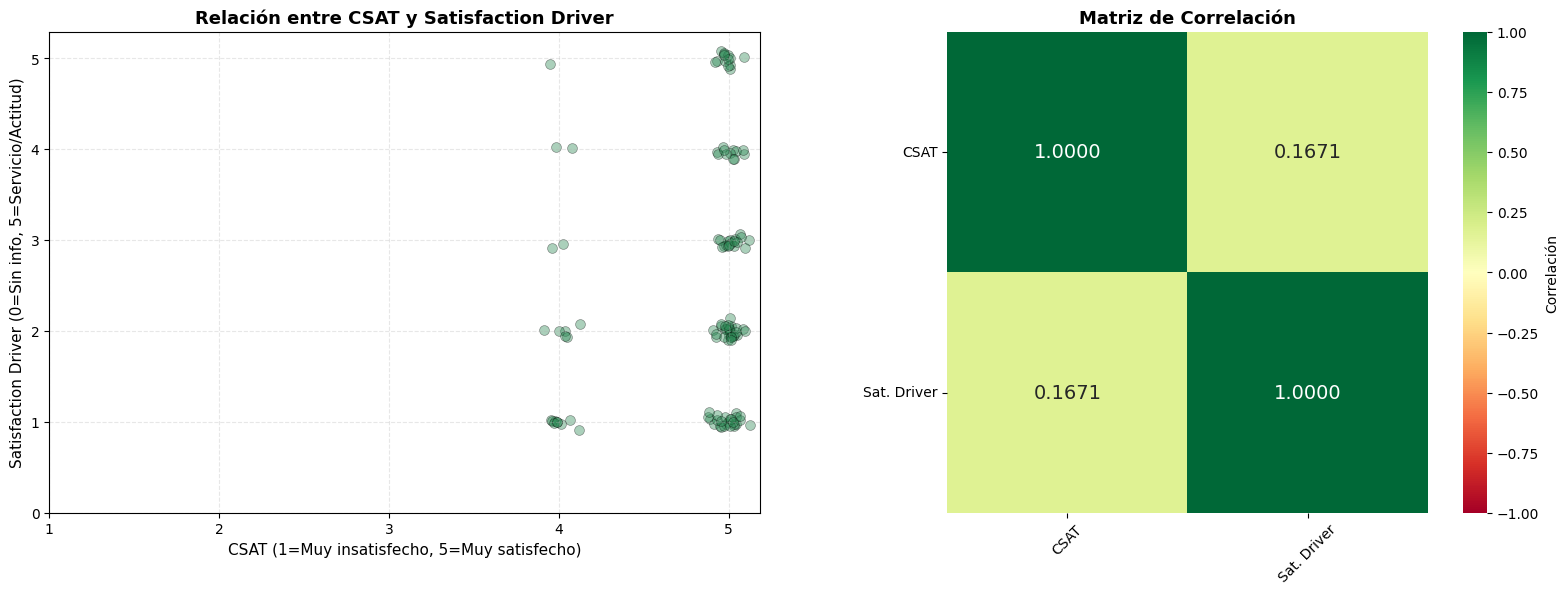

In [55]:
# Visualización 1: Scatter plot y Matriz de correlación CSAT vs Satisfaction Driver
if len(df_csat_driver) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Scatter plot con jitter
    jitter_x = np.random.normal(0, 0.05, size=len(df_csat_driver))
    jitter_y = np.random.normal(0, 0.05, size=len(df_csat_driver))
    
    axes[0].scatter(df_csat_driver['CSAT_numeric'] + jitter_x, 
                   df_csat_driver['Driver_Tema_numeric'] + jitter_y, 
                   alpha=0.4, s=50, edgecolors='black', linewidth=0.5, color='seagreen')
    axes[0].set_xlabel('CSAT (1=Muy insatisfecho, 5=Muy satisfecho)', fontsize=11)
    axes[0].set_ylabel('Satisfaction Driver (0=Sin info, 5=Servicio/Actitud)', fontsize=11)
    axes[0].set_title('Relación entre CSAT y Satisfaction Driver', fontsize=13, fontweight='bold')
    axes[0].grid(True, alpha=0.3, linestyle='--')
    axes[0].set_xticks([1, 2, 3, 4, 5])
    axes[0].set_yticks([0, 1, 2, 3, 4, 5])
    
    # Gráfico 2: Matriz de correlación
    corr_matrix = df_csat_driver[['CSAT_numeric', 'Driver_Tema_numeric']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, 
                square=True, ax=axes[1], vmin=-1, vmax=1, fmt='.4f',
                cbar_kws={'label': 'Correlación'}, annot_kws={'size': 14})
    axes[1].set_title('Matriz de Correlación', fontsize=13, fontweight='bold')
    axes[1].set_xticklabels(['CSAT', 'Sat. Driver'], rotation=45)
    axes[1].set_yticklabels(['CSAT', 'Sat. Driver'], rotation=0)
    
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes datos para visualizar.")


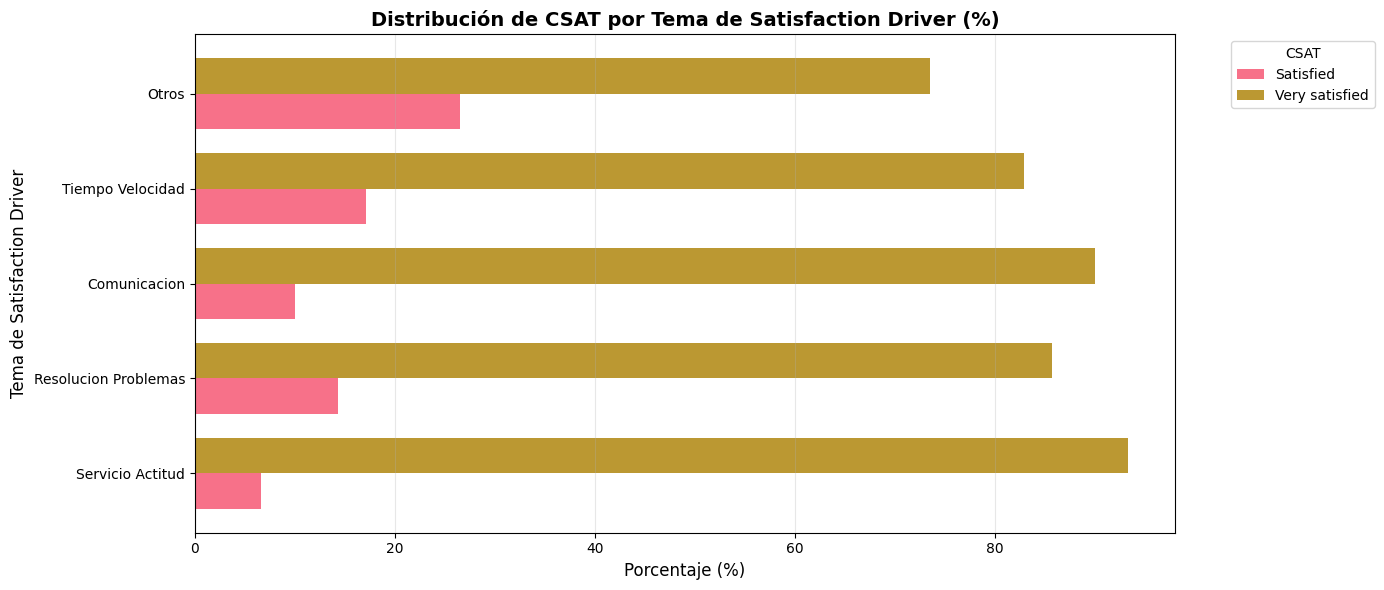


Tabla de frecuencias por Tema de Satisfaction Driver (%):
2-CSAT                Satisfied  Very satisfied
Driver_Tema                                    
Servicio_Actitud            6.7            93.3
Resolucion_Problemas       14.3            85.7
Comunicacion               10.0            90.0
Tiempo_Velocidad           17.1            82.9
Otros                      26.5            73.5


In [56]:
# Visualización 2: Distribución de CSAT por TEMA de Satisfaction Driver
if len(df_csat_driver) > 0:
    # Crear tabla de frecuencias por temas
    tabla_freq = pd.crosstab(df_csat_driver['Driver_Tema'], 
                              df_csat_driver['2-CSAT'], 
                              normalize='index') * 100
    
    # Ordenar por importancia
    orden_temas = ['Servicio_Actitud', 'Resolucion_Problemas', 'Comunicacion', 
                   'Tiempo_Velocidad', 'Otros']
    tabla_freq = tabla_freq.reindex([t for t in orden_temas if t in tabla_freq.index])
    
    # Crear gráfico de barras horizontal
    fig, ax = plt.subplots(figsize=(14, 6))
    tabla_freq.plot(kind='barh', stacked=False, ax=ax, width=0.75)
    ax.set_xlabel('Porcentaje (%)', fontsize=12)
    ax.set_ylabel('Tema de Satisfaction Driver', fontsize=12)
    ax.set_title('Distribución de CSAT por Tema de Satisfaction Driver (%)', 
                 fontsize=14, fontweight='bold')
    ax.legend(title='CSAT', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Renombrar etiquetas del eje Y
    etiquetas_legibles = [t.replace('_', ' ') for t in tabla_freq.index]
    ax.set_yticklabels(etiquetas_legibles)
    
    plt.tight_layout()
    plt.show()
    
    print("\nTabla de frecuencias por Tema de Satisfaction Driver (%):")
    print("="*80)
    print(tabla_freq.round(1))
else:
    print("No hay suficientes datos para visualizar.")


Estadísticas de CSAT por TEMA de Satisfaction Driver:
                      Conteo  Media  Mediana  Desv.Est  Mínimo  Máximo
Driver_Tema                                                           
Servicio_Actitud          15   4.93      5.0      0.26     4.0     5.0
Resolucion_Problemas      14   4.86      5.0      0.36     4.0     5.0
Comunicacion              20   4.90      5.0      0.31     4.0     5.0
Tiempo_Velocidad          35   4.83      5.0      0.38     4.0     5.0
Otros                     34   4.74      5.0      0.45     4.0     5.0


C:\Users\ECOPETROL\AppData\Local\Temp\ipykernel_13900\752074351.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(datos_box, labels=etiquetas, patch_artist=True,


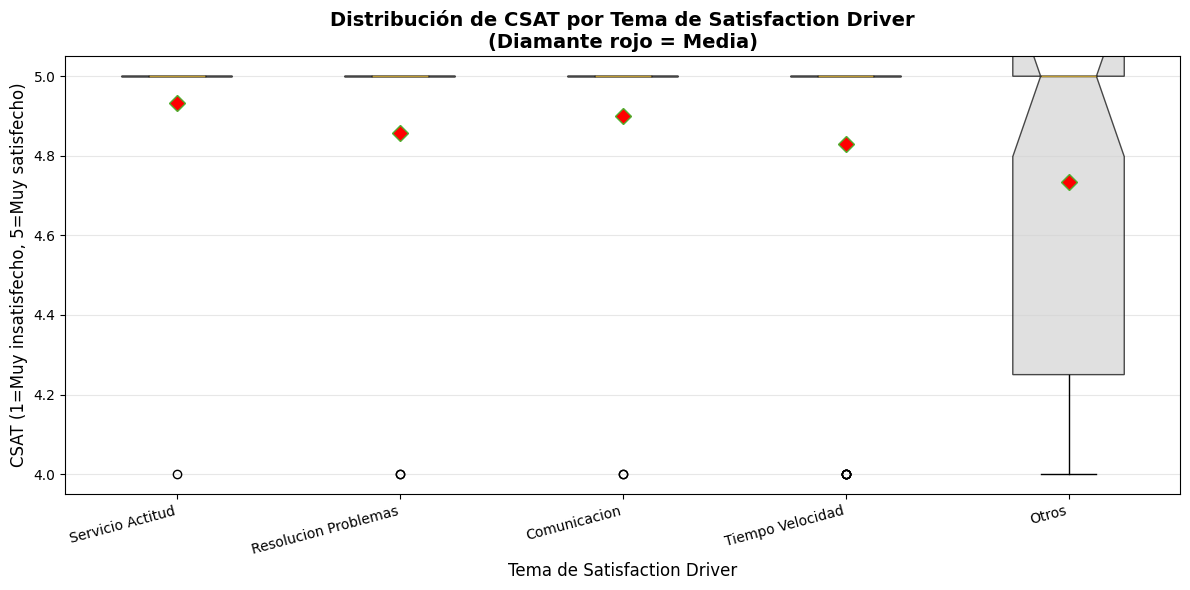

In [57]:
# Visualización 3: Box plots y estadísticas de CSAT por Tema de Satisfaction Driver
if len(df_csat_driver) > 0:
    print("Estadísticas de CSAT por TEMA de Satisfaction Driver:")
    print("="*80)
    
    stats_by_tema = df_csat_driver.groupby('Driver_Tema')['CSAT_numeric'].agg([
        ('Conteo', 'count'),
        ('Media', 'mean'),
        ('Mediana', 'median'),
        ('Desv.Est', 'std'),
        ('Mínimo', 'min'),
        ('Máximo', 'max')
    ]).round(2)
    
    # Ordenar por importancia
    orden_temas = ['Servicio_Actitud', 'Resolucion_Problemas', 'Comunicacion', 
                   'Tiempo_Velocidad', 'Otros']
    stats_by_tema = stats_by_tema.reindex([t for t in orden_temas if t in stats_by_tema.index])
    
    print(stats_by_tema)
    
    # Box plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Preparar datos para box plot
    datos_box = []
    etiquetas = []
    for tema in orden_temas:
        if tema in df_csat_driver['Driver_Tema'].values:
            datos_box.append(df_csat_driver[df_csat_driver['Driver_Tema'] == tema]['CSAT_numeric'].values)
            etiquetas.append(tema.replace('_', ' '))
    
    bp = ax.boxplot(datos_box, labels=etiquetas, patch_artist=True, 
                    notch=True, showmeans=True,
                    meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
    
    # Colorear cajas con degradado de importancia
    colors = ['#90EE90', '#98D8C8', '#6FA8DC', '#9FC5E8', '#D3D3D3']
    for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel('CSAT (1=Muy insatisfecho, 5=Muy satisfecho)', fontsize=12)
    ax.set_xlabel('Tema de Satisfaction Driver', fontsize=12)
    ax.set_title('Distribución de CSAT por Tema de Satisfaction Driver\n(Diamante rojo = Media)', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes datos para el análisis.")


TABLA CRUZADA: CSAT vs TEMA de Satisfaction Driver

Frecuencias absolutas:
Driver_Tema     Servicio_Actitud  Resolucion_Problemas  Comunicacion  \
2-CSAT                                                                 
Satisfied                      1                     2             2   
Very satisfied                14                    12            18   
TOTAL                         15                    14            20   

Driver_Tema     Tiempo_Velocidad  Otros  TOTAL  
2-CSAT                                          
Satisfied                      6      9     20  
Very satisfied                29     25     98  
TOTAL                         35     34    118  

Porcentajes por fila (%):
Driver_Tema     Servicio_Actitud  Resolucion_Problemas  Comunicacion  \
2-CSAT                                                                 
Satisfied                    5.0                  10.0          10.0   
Very satisfied              14.3                  12.2          18.4   

Dri

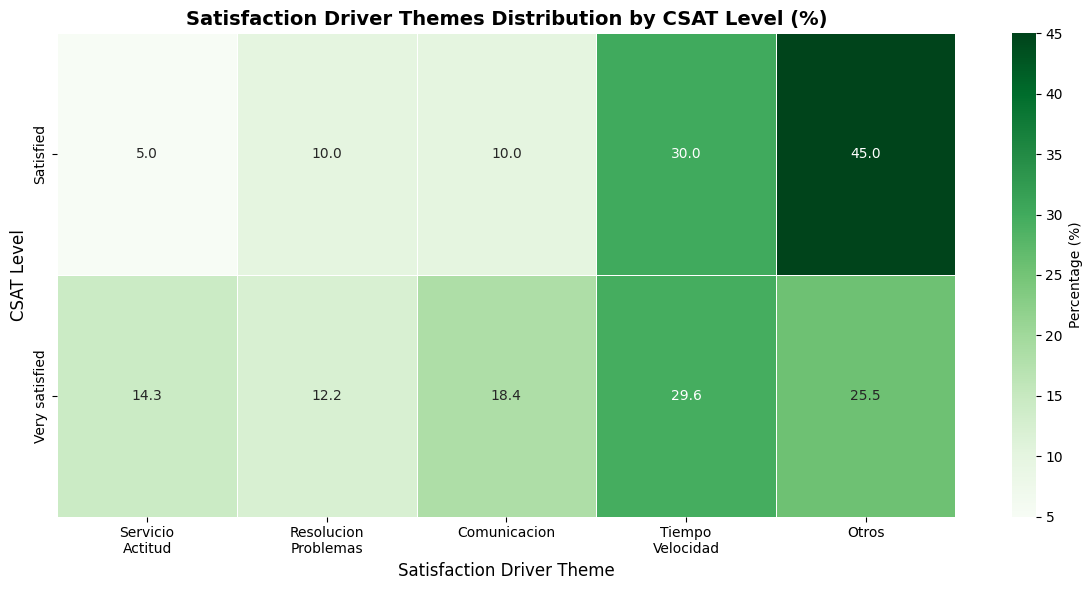

In [58]:
# Visualización 4: Tabla cruzada y Heatmap CSAT vs Satisfaction Driver
if len(df_csat_driver) > 0:
    print("TABLA CRUZADA: CSAT vs TEMA de Satisfaction Driver")
    print("="*80)
    print("\nFrecuencias absolutas:")
    
    tabla_cruzada = pd.crosstab(
        df_csat_driver['2-CSAT'], 
        df_csat_driver['Driver_Tema'],
        margins=True,
        margins_name='TOTAL'
    )
    
    # Ordenar columnas
    orden_cols = ['Servicio_Actitud', 'Resolucion_Problemas', 'Comunicacion', 
                  'Tiempo_Velocidad', 'Otros', 'TOTAL']
    tabla_cruzada = tabla_cruzada[[col for col in orden_cols if col in tabla_cruzada.columns]]
    
    print(tabla_cruzada)
    
    print("\n" + "="*80)
    print("Porcentajes por fila (%):")
    
    tabla_pct = pd.crosstab(
        df_csat_driver['2-CSAT'], 
        df_csat_driver['Driver_Tema'],
        normalize='index'
    ) * 100
    
    # Ordenar columnas
    tabla_pct = tabla_pct[[col for col in orden_cols[:-1] if col in tabla_pct.columns]]
    
    print(tabla_pct.round(1))
    
    # Heatmap de la tabla cruzada
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(tabla_pct, annot=True, fmt='.1f', cmap='Greens', 
                cbar_kws={'label': 'Percentage (%)'}, ax=ax, linewidths=0.5)
    ax.set_title('Satisfaction Driver Themes Distribution by CSAT Level (%)', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Satisfaction Driver Theme', fontsize=12)
    ax.set_ylabel('CSAT Level', fontsize=12)
    
    # Mejorar etiquetas del eje X
    etiquetas_x = [col.replace('_', '\n') for col in tabla_pct.columns]
    ax.set_xticklabels(etiquetas_x, rotation=0, ha='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos suficientes para crear tabla cruzada.")


Checking available data:
Total rows in df: 5000
Rows with Driver_Tema != 'Sin Driver': 118
Unique months in full data: ['agosto', 'julio', 'septiembre']
Unique vendors: ['TP' 'NOT TP']


Total cases with Satisfaction Driver (excluding October): 118
Months in filtered data: ['agosto', 'julio', 'septiembre']
Vendors in filtered data: ['NOT TP' 'TP']

Grouped data preview:
month       VENDOR
agosto      NOT TP    32
            TP         9
julio       NOT TP    22
            TP        16
septiembre  NOT TP    23
            TP        16
dtype: int64


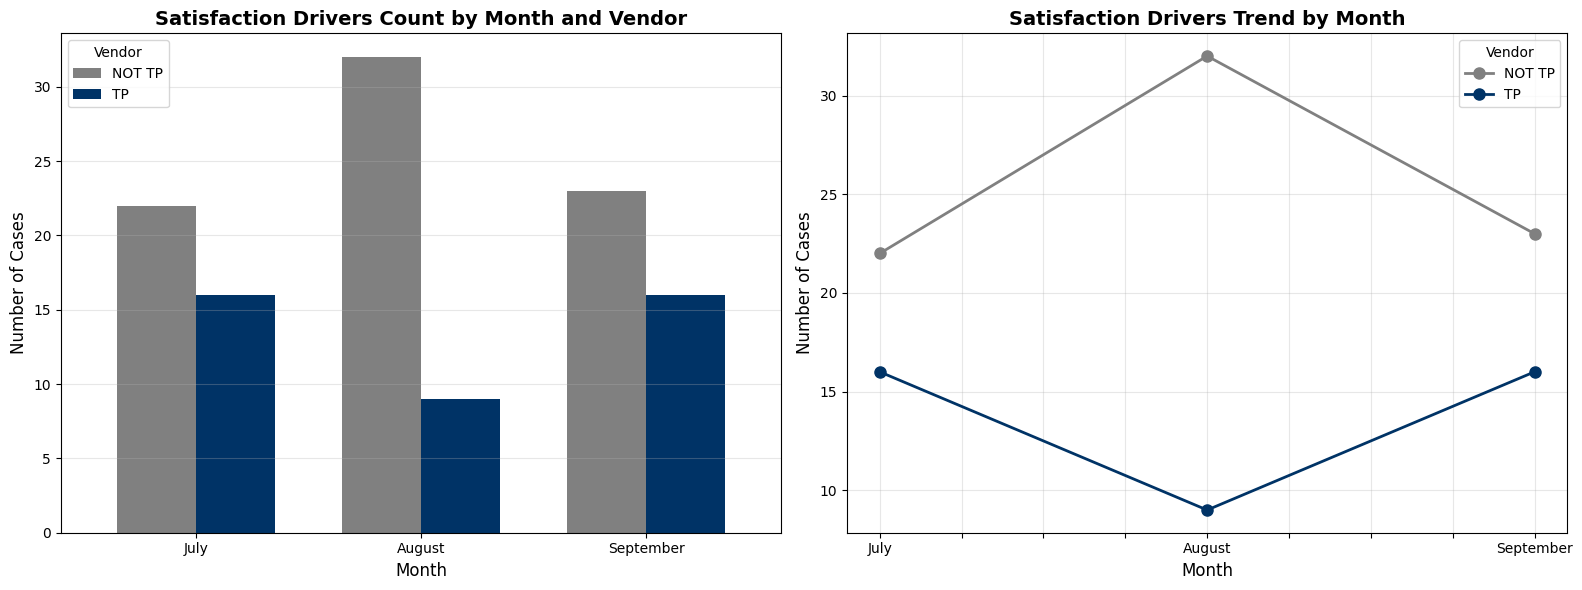


Satisfaction Drivers by Month and Vendor:
VENDOR     NOT TP  TP
July           22  16
August         32   9
September      23  16


In [59]:
# Satisfaction Drivers Analysis by Month and Vendor

# First, check what data we have
print("Checking available data:")
print(f"Total rows in df: {len(df)}")
print(f"Rows with Driver_Tema != 'Sin Driver': {len(df[df['Driver_Tema'] != 'Sin Driver'])}")
print(f"Unique months in full data: {sorted(df['month'].unique())}")
print(f"Unique vendors: {df['VENDOR'].unique()}")
print("\n")

# Filter data with Satisfaction Driver and exclude October (lowercase!)
df_drivers = df[(df['Driver_Tema'] != 'Sin Driver') & (df['month'] != 'octubre')].copy()

print(f"Total cases with Satisfaction Driver (excluding October): {len(df_drivers)}")
if len(df_drivers) > 0:
    print(f"Months in filtered data: {sorted(df_drivers['month'].unique())}")
    print(f"Vendors in filtered data: {df_drivers['VENDOR'].unique()}")
    
    # Show sample of grouped data
    print("\nGrouped data preview:")
    print(df_drivers.groupby(['month', 'VENDOR']).size())

# Define month order and translation (using lowercase as in data!)
orden_meses = ['julio', 'agosto', 'septiembre']
traduccion_meses = {'julio': 'July', 'agosto': 'August', 'septiembre': 'September'}

if len(df_drivers) > 0:
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Graph 1: Count of Satisfaction Drivers by Month and Vendor
    # Group by month and vendor
    conteo_mes_vendor = df_drivers.groupby(['month', 'VENDOR']).size().unstack(fill_value=0)
    # Reorder months (using Spanish names from data)
    conteo_mes_vendor = conteo_mes_vendor.reindex(orden_meses)
    
    # Define colors: dark gray and dark blue
    colores = ['#808080', '#003366']  # Gray and dark blue
    
    # Create grouped bar chart
    conteo_mes_vendor.plot(kind='bar', ax=axes[0], width=0.7, color=colores)
    axes[0].set_xlabel('Month', fontsize=12)
    axes[0].set_ylabel('Number of Cases', fontsize=12)
    axes[0].set_title('Satisfaction Drivers Count by Month and Vendor', fontsize=14, fontweight='bold')
    axes[0].legend(title='Vendor', loc='upper left')
    axes[0].grid(True, alpha=0.3, axis='y')
    # Translate month labels to English for display
    etiquetas_meses = [traduccion_meses.get(m.get_text(), m.get_text()) for m in axes[0].get_xticklabels()]
    axes[0].set_xticklabels(etiquetas_meses, rotation=0)
    
    # Graph 2: Trend of Satisfaction Drivers by Month
    # Translate index for the line chart
    tendencia_mes = conteo_mes_vendor.copy()
    tendencia_mes.index = [traduccion_meses.get(m, m) for m in tendencia_mes.index]
    
    # Create line chart with same colors
    tendencia_mes.plot(kind='line', ax=axes[1], marker='o', linewidth=2, markersize=8, color=colores)
    axes[1].set_xlabel('Month', fontsize=12)
    axes[1].set_ylabel('Number of Cases', fontsize=12)
    axes[1].set_title('Satisfaction Drivers Trend by Month', fontsize=14, fontweight='bold')
    axes[1].legend(title='Vendor', loc='upper right')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Show statistics table with translated headers
    conteo_traducido = conteo_mes_vendor.copy()
    conteo_traducido.index = [traduccion_meses.get(m, m) for m in conteo_traducido.index]
    print("\nSatisfaction Drivers by Month and Vendor:")
    print("="*80)
    print(conteo_traducido)
else:
    print("No data available to create graphs.")


In [60]:
# Convert this notebook to HTML for GitHub Pages
import os
import subprocess

notebook_name = 'analisis_eda_crudo_Keimi.ipynb'
output_name = 'index.html'

try:
    # Try using nbconvert
    result = subprocess.run(
        ['jupyter', 'nbconvert', '--to', 'html', '--output', output_name, notebook_name],
        capture_output=True,
        text=True
    )
    
    if result.returncode == 0:
        print(f"✅ Successfully converted to HTML!")
        print(f"📄 File created: {output_name}")
        print(f"📂 Location: {os.getcwd()}")
        print(f"\n🌐 You can now upload this to GitHub for GitHub Pages")
    else:
        print(f"❌ Error: {result.stderr}")
        print(f"\n💡 Try Method 1 or 2 instead (see instructions above)")
        
except Exception as e:
    print(f"❌ Could not convert: {e}")
    print(f"\n💡 Alternative: Use VS Code menu (... → Export → HTML)")


✅ Successfully converted to HTML!
📄 File created: index.html
📂 Location: c:\Users\ECOPETROL\Downloads

🌐 You can now upload this to GitHub for GitHub Pages


Total TP cases with Satisfaction Driver (excluding October): 41

Top 5 Satisfaction Drivers for TP vendor:
4-Satisfaction Driver
Problem processing time            10
Proactively follow up on issues     9
Promise fulfillment                 6
Problem-solving                     5
Response time                       5
dtype: int64




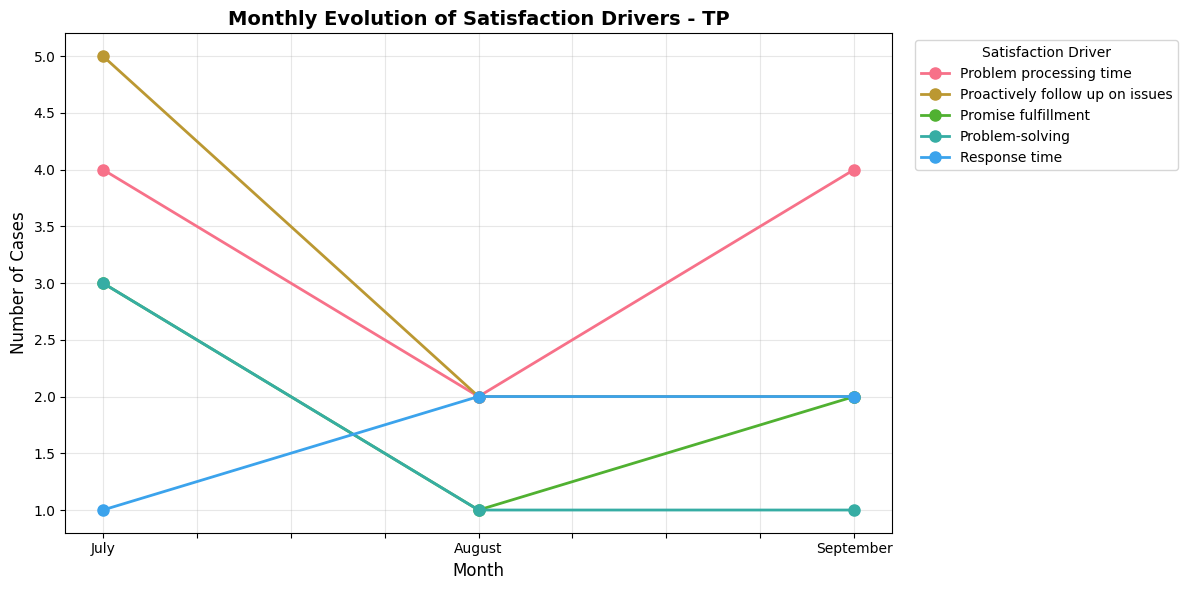


Satisfaction Drivers by Month (TP only):
4-Satisfaction Driver  Problem processing time  \
July                                         4   
August                                       2   
September                                    4   

4-Satisfaction Driver  Proactively follow up on issues  Promise fulfillment  \
July                                                 5                    3   
August                                               2                    1   
September                                            2                    2   

4-Satisfaction Driver  Problem-solving  Response time  
July                                 3              1  
August                               1              2  
September                            1              2  


In [61]:
# Monthly Evolution of Satisfaction Drivers - TP Vendor

# Filter data: only TP vendor, with Satisfaction Driver, exclude October
df_tp_drivers = df[(df['VENDOR'] == 'TP') & 
                   (df['4-Satisfaction Driver'].notna()) & 
                   (df['month'] != 'octubre')].copy()

print(f"Total TP cases with Satisfaction Driver (excluding October): {len(df_tp_drivers)}")

if len(df_tp_drivers) > 0:
    # Group by month and specific driver type
    evolucion_drivers = df_tp_drivers.groupby(['month', '4-Satisfaction Driver']).size().unstack(fill_value=0)
    
    # Get the top 5 most important drivers (by total count)
    top_drivers = evolucion_drivers.sum().nlargest(5)
    print(f"\nTop 5 Satisfaction Drivers for TP vendor:")
    print(top_drivers)
    print("\n")
    
    # Filter to keep only top 5 drivers
    evolucion_drivers = evolucion_drivers[top_drivers.index]
    
    # Reorder months
    evolucion_drivers = evolucion_drivers.reindex(orden_meses)
    
    # Translate month names
    evolucion_drivers.index = [traduccion_meses.get(m, m) for m in evolucion_drivers.index]
    
    # Create line chart
    fig, ax = plt.subplots(figsize=(12, 6))
    evolucion_drivers.plot(kind='line', ax=ax, marker='o', linewidth=2, markersize=8)
    
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Number of Cases', fontsize=12)
    ax.set_title('Monthly Evolution of Satisfaction Drivers - TP', fontsize=14, fontweight='bold')
    ax.legend(title='Satisfaction Driver', loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Show statistics table
    print("\nSatisfaction Drivers by Month (TP only):")
    print("="*80)
    print(evolucion_drivers)
else:
    print("No data available for TP vendor.")


Total cases with CSAT and Satisfaction Driver: 118

Top 12 Drivers with POSITIVE Impact on CSAT:
                            Driver  Correlation  Count  Avg_CSAT
5                 Service attitude     0.104587     15  4.933333
1             Communication skills     0.083673     20  4.900000
4                  Problem-solving     0.026046     14  4.857143
2                    Response time     0.002533     12  4.833333
0          Problem processing time    -0.005799     23  4.826087
3              Promise fulfillment    -0.031031     15  4.800000
6  Proactively follow up on issues    -0.170825     19  4.684211


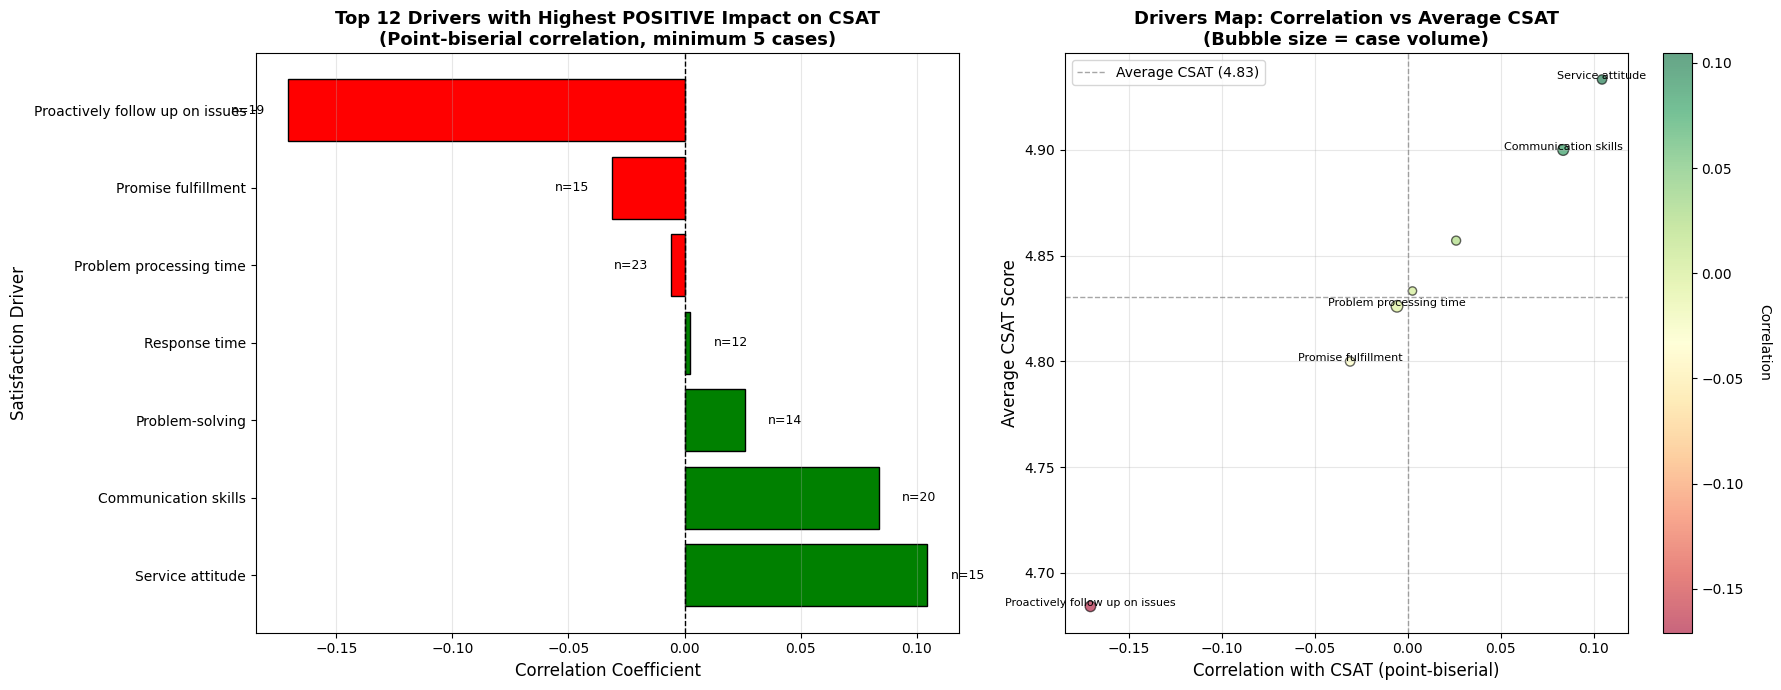


Detailed Statistics - Top Satisfaction Drivers:
                         Driver  Correlation  P-value  Avg_CSAT  Count
               Service attitude     0.104587 0.259696  4.933333     15
           Communication skills     0.083673 0.367678  4.900000     20
                Problem-solving     0.026046 0.779501  4.857143     14
                  Response time     0.002533 0.978280  4.833333     12
        Problem processing time    -0.005799 0.950308  4.826087     23
            Promise fulfillment    -0.031031 0.738697  4.800000     15
Proactively follow up on issues    -0.170825 0.064386  4.684211     19


In [62]:
# Correlation Analysis: Satisfaction Drivers and CSAT

# Filter cases with both CSAT and Satisfaction Driver
df_driver_csat = df[(df['CSAT_numeric'].notna()) & (df['4-Satisfaction Driver'].notna())].copy()

print(f"Total cases with CSAT and Satisfaction Driver: {len(df_driver_csat)}")

if len(df_driver_csat) >= 5:
    # Calculate correlation and average CSAT for each driver
    from scipy.stats import pointbiserialr
    
    resultados_drivers = []
    
    for driver in df_driver_csat['4-Satisfaction Driver'].unique():
        # Create binary variable (1 if this driver, 0 otherwise)
        df_driver_csat[f'is_{driver}'] = (df_driver_csat['4-Satisfaction Driver'] == driver).astype(int)
        
        # Calculate point-biserial correlation
        if df_driver_csat[f'is_{driver}'].sum() >= 5:  # Minimum 5 cases
            corr, p_value = pointbiserialr(df_driver_csat[f'is_{driver}'], df_driver_csat['CSAT_numeric'])
            
            # Calculate average CSAT for this driver
            avg_csat = df_driver_csat[df_driver_csat['4-Satisfaction Driver'] == driver]['CSAT_numeric'].mean()
            count = df_driver_csat[f'is_{driver}'].sum()
            
            resultados_drivers.append({
                'Driver': driver,
                'Correlation': corr,
                'P-value': p_value,
                'Avg_CSAT': avg_csat,
                'Count': count
            })
    
    # Create DataFrame with results
    df_resultados = pd.DataFrame(resultados_drivers)
    df_resultados = df_resultados.sort_values('Correlation', ascending=True)
    
    # Get top 12 drivers by absolute correlation value
    df_top12 = df_resultados.nlargest(12, 'Correlation')
    
    print(f"\nTop 12 Drivers with POSITIVE Impact on CSAT:")
    print(df_top12[['Driver', 'Correlation', 'Count', 'Avg_CSAT']])
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Graph 1: Horizontal bar chart of correlations
    colors = ['green' if x > 0 else 'red' for x in df_top12['Correlation']]
    axes[0].barh(df_top12['Driver'], df_top12['Correlation'], color=colors, edgecolor='black')
    axes[0].set_xlabel('Correlation Coefficient', fontsize=12)
    axes[0].set_ylabel('Satisfaction Driver', fontsize=12)
    axes[0].set_title('Top 12 Drivers with Highest POSITIVE Impact on CSAT\n(Point-biserial correlation, minimum 5 cases)', 
                      fontsize=13, fontweight='bold')
    axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1)
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Add correlation values on bars
    for i, (driver, corr, count) in enumerate(zip(df_top12['Driver'], df_top12['Correlation'], df_top12['Count'])):
        axes[0].text(corr + 0.01 if corr > 0 else corr - 0.01, i, f'n={int(count)}', 
                    va='center', ha='left' if corr > 0 else 'right', fontsize=9)
    
    # Graph 2: Bubble chart - Correlation vs Average CSAT
    scatter = axes[1].scatter(df_resultados['Correlation'], df_resultados['Avg_CSAT'], 
                             s=df_resultados['Count']*3, alpha=0.6, 
                             c=df_resultados['Correlation'], cmap='RdYlGn', 
                             edgecolors='black', linewidth=1)
    
    # Add labels for top drivers
    for idx, row in df_resultados.iterrows():
        if row['Count'] >= 15:  # Label only drivers with 15+ cases
            axes[1].annotate(row['Driver'], 
                           (row['Correlation'], row['Avg_CSAT']),
                           fontsize=8, ha='center')
    
    axes[1].set_xlabel('Correlation with CSAT (point-biserial)', fontsize=12)
    axes[1].set_ylabel('Average CSAT Score', fontsize=12)
    axes[1].set_title('Drivers Map: Correlation vs Average CSAT\n(Bubble size = case volume)', 
                     fontsize=13, fontweight='bold')
    axes[1].axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    axes[1].axhline(y=df_driver_csat['CSAT_numeric'].mean(), color='gray', linestyle='--', linewidth=1, alpha=0.7, 
                   label=f'Average CSAT ({df_driver_csat["CSAT_numeric"].mean():.2f})')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend(loc='upper left')
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=axes[1])
    cbar.set_label('Correlation', rotation=270, labelpad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Show detailed statistics table
    print("\nDetailed Statistics - Top Satisfaction Drivers:")
    print("="*100)
    print(df_top12[['Driver', 'Correlation', 'P-value', 'Avg_CSAT', 'Count']].to_string(index=False))
else:
    print("Not enough data for correlation analysis.")


## 📊 Resumen del Análisis CSAT vs Satisfaction Driver

### 🎯 Agrupación Temática de Satisfaction Drivers

Los **Satisfaction Drivers** (factores que impulsan la satisfacción) se agruparon en **5 temas principales**:

| Tema | Descripción | Valor |
|------|-------------|-------|
| **Servicio/Actitud** | Actitud del personal, profesionalismo, amabilidad | 5 (más importante) |
| **Resolución de Problemas** | Capacidad de resolver el problema del cliente | 4 |
| **Comunicación** | Calidad de la comunicación, claridad en explicaciones | 3 |
| **Tiempo/Velocidad** | Rapidez en la respuesta y atención | 2 |
| **Otros** | Otros factores no clasificados | 1 |

---

### 📈 Interpretación de la Correlación

**¿Qué esperamos encontrar?**
- **Correlación POSITIVA**: A mayor satisfacción (CSAT alto), los clientes mencionan drivers más importantes
- Esto indicaría que factores como la actitud del servicio y la resolución de problemas son clave para lograr alta satisfacción

**Diferencia con DSAT:**
- **DSAT** (razones de insatisfacción): Esperamos correlación NEGATIVA con CSAT
- **Satisfaction Driver**: Esperamos correlación POSITIVA con CSAT
- Ambos análisis son complementarios para entender qué impulsa la satisfacción del cliente

---

### 💡 Insights Clave

Los análisis permiten identificar:

1. **Drivers principales**: Qué factores mencionan más frecuentemente los clientes satisfechos
2. **Relación con CSAT**: Cómo cada driver se asocia con diferentes niveles de satisfacción
3. **Estrategias de mejora**: En qué aspectos enfocar para aumentar la satisfacción general

---

### 🔍 Conclusiones del Análisis Completo

Combinando los análisis de **DSAT Reason** y **Satisfaction Driver**:

- **DSAT → CSAT**: Identifica qué problemas reducen la satisfacción
- **Satisfaction Driver → CSAT**: Identifica qué factores aumentan la satisfacción
- **Juntos**: Ofrecen una visión 360° de la experiencia del cliente


In [63]:
%run generate_synthetic_data.py

✅ Synthetic dataset created successfully!
📊 File: Customer_Satisfaction_Sample_Data.csv
📈 Records: 5,000

Dataset characteristics:
  - CSAT responses: 244 (4.9%)
  - DSAT reasons: 21
  - Satisfaction drivers: 118
  - Vendors: ['TP' 'NOT TP']
  - Months: ['agosto', 'julio', 'septiembre']

✅ Ready to use for your portfolio!

⚠️ IMPORTANT: This is synthetic data for demonstration purposes only.


<Figure size 640x480 with 0 Axes>